In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ta

In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_train = dataset_train.drop(["Date","Turnover (Lacs)"], axis=1)
dataset_train= ta.utils.dropna(dataset_train)
print(len(dataset_train))

800


In [3]:
training_set = dataset_train.iloc[:,:].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60,800 ):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i,4])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 6)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 1000, batch_size = 60)


Epoch 1/1000
740/740 [==============================] - 3s 3ms/step - loss: 0.0482
Epoch 2/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0085
Epoch 3/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0041
Epoch 4/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0028
Epoch 5/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0024
Epoch 6/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0022
Epoch 7/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 8/1000
740/740 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 9/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 10/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0021
Epoch 11/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 12/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0022


740/740 [==============================] - 2s 2ms/step - loss: 0.0010
Epoch 97/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 98/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 99/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0010
Epoch 100/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 101/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 102/1000
740/740 [==============================] - 2s 3ms/step - loss: 8.8310e-04
Epoch 103/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 104/1000
740/740 [==============================] - 2s 2ms/step - loss: 8.5260e-04
Epoch 105/1000
740/740 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 106/1000
740/740 [==============================] - 2s 2ms/step - loss: 9.4587e-04
Epoch 107/1000
740/740 [==============================] - 2s 2ms/step -

740/740 [==============================] - 2s 2ms/step - loss: 7.9440e-04
Epoch 190/1000
740/740 [==============================] - 2s 2ms/step - loss: 8.2402e-04
Epoch 191/1000
740/740 [==============================] - 2s 2ms/step - loss: 8.6389e-04
Epoch 192/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.0718e-04
Epoch 193/1000
740/740 [==============================] - 2s 2ms/step - loss: 8.5345e-04
Epoch 194/1000
740/740 [==============================] - 2s 2ms/step - loss: 9.0178e-04
Epoch 195/1000
740/740 [==============================] - 2s 2ms/step - loss: 8.2150e-04
Epoch 196/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.9857e-04
Epoch 197/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.0002e-04
Epoch 198/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.9574e-04
Epoch 199/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.5634e-04
Epoch 200/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 7.1278e-04
Epoch 282/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.3434e-04
Epoch 283/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.9865e-04
Epoch 284/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.4239e-04
Epoch 285/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.0328e-04
Epoch 286/1000
740/740 [==============================] - 2s 2ms/step - loss: 8.2402e-04
Epoch 287/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.1262e-04
Epoch 288/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.1148e-04
Epoch 289/1000
740/740 [==============================] - 2s 2ms/step - loss: 7.6287e-04
Epoch 290/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6794e-04
Epoch 291/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.1844e-04
Epoch 292/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 6.9435e-04
Epoch 374/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8954e-04
Epoch 375/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1862e-04
Epoch 376/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.5567e-04
Epoch 377/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.7955e-04
Epoch 378/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.9628e-04
Epoch 379/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.3669e-04
Epoch 380/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.2857e-04
Epoch 381/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.8878e-04
Epoch 382/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.2309e-04
Epoch 383/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.6796e-04
Epoch 384/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 5.4577e-04
Epoch 466/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6463e-04
Epoch 467/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6739e-04
Epoch 468/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.7383e-04
Epoch 469/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8388e-04
Epoch 470/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.1008e-04
Epoch 471/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.5749e-04
Epoch 472/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.8495e-04
Epoch 473/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.4913e-04
Epoch 474/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.7934e-04
Epoch 475/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1576e-04
Epoch 476/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 4.7799e-04
Epoch 558/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1981e-04
Epoch 559/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.4975e-04
Epoch 560/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.2755e-04
Epoch 561/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9617e-04
Epoch 562/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8303e-04
Epoch 563/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1015e-04
Epoch 564/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6564e-04
Epoch 565/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6144e-04
Epoch 566/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.4471e-04
Epoch 567/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.0272e-04
Epoch 568/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 5.6012e-04
Epoch 650/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.3456e-04
Epoch 651/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.7605e-04
Epoch 652/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9917e-04
Epoch 653/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1874e-04
Epoch 654/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6535e-04
Epoch 655/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8663e-04
Epoch 656/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.4025e-04
Epoch 657/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9163e-04
Epoch 658/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8493e-04
Epoch 659/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9439e-04
Epoch 660/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 4.9127e-04
Epoch 742/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6955e-04
Epoch 743/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.7956e-04
Epoch 744/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.4772e-04
Epoch 745/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.9746e-04
Epoch 746/1000
740/740 [==============================] - 2s 2ms/step - loss: 6.2925e-04
Epoch 747/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.5315e-04
Epoch 748/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1725e-04
Epoch 749/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1101e-04
Epoch 750/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.3667e-04
Epoch 751/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6289e-04
Epoch 752/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 4.7766e-04
Epoch 834/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.2706e-04
Epoch 835/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1547e-04
Epoch 836/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.7184e-04
Epoch 837/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8113e-04
Epoch 838/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.2584e-04
Epoch 839/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.5379e-04
Epoch 840/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.4891e-04
Epoch 841/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.7290e-04
Epoch 842/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9312e-04
Epoch 843/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.7010e-04
Epoch 844/1000
740/740 [============

740/740 [==============================] - 2s 2ms/step - loss: 4.8058e-04
Epoch 926/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.6393e-04
Epoch 927/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.5287e-04
Epoch 928/1000
740/740 [==============================] - 2s 3ms/step - loss: 5.2562e-04
Epoch 929/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8008e-04
Epoch 930/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9586e-04
Epoch 931/1000
740/740 [==============================] - 2s 2ms/step - loss: 5.1453e-04
Epoch 932/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.8389e-04
Epoch 933/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.9243e-04
Epoch 934/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.5146e-04
Epoch 935/1000
740/740 [==============================] - 2s 2ms/step - loss: 4.3177e-04
Epoch 936/1000
740/740 [============

In [8]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values
print(len(real_stock_price))
dataset_test = dataset_test.drop(["Date","Turnover (Lacs)"], axis=1)
dataset_test= ta.utils.dropna(dataset_test)

300


In [9]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,6)
inputs = sc.transform(inputs)
print(len(dataset_total)-len(dataset_test)-60)

740


In [10]:
X_test = []
print(len(inputs))
for i in range(60, 360) :
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],6))
predicted_stock_price = regressor.predict(X_test)
print(len(predicted_stock_price))

360
300


In [11]:
predicted_stock_price1 = np.zeros(shape=(len(X_test), 6) )
predicted_stock_price1[:,4] = predicted_stock_price[:,0]
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price1)[:,4]

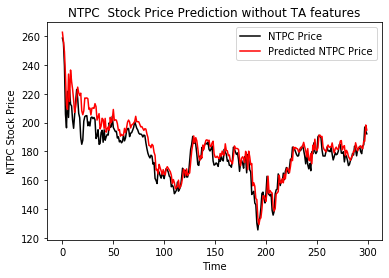

In [15]:
plt.plot(real_stock_price, color = 'black', label = 'NTPC Price')
plt.plot(predicted_stock_price2, color = 'red', label = 'Predicted NTPC Price')
plt.title('NTPC  Stock Price Prediction without TA features')
plt.xlabel('Time')
plt.ylabel('NTPC Stock Price')
plt.legend()
plt.show()

In [13]:
estimation_residue=(real_stock_price-predicted_stock_price2)
estimation_residue.mean()

-4.081469289829315

In [14]:
estimation_percentage=(real_stock_price/predicted_stock_price2)
estimation_percentage.mean()

0.9896195210975275